In [12]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

C:\Users\Hariprasath\AppData\Local\Temp\ipykernel_1956\2937000911.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [13]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo_sales.csv', header=0, index_col=0, parse_dates=True,squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')

C:\Users\Hariprasath\AppData\Local\Temp\ipykernel_1956\2048092175.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo_sales.csv', header=0, index_col=0, parse_dates=True,squeeze=True, date_parser=parser)


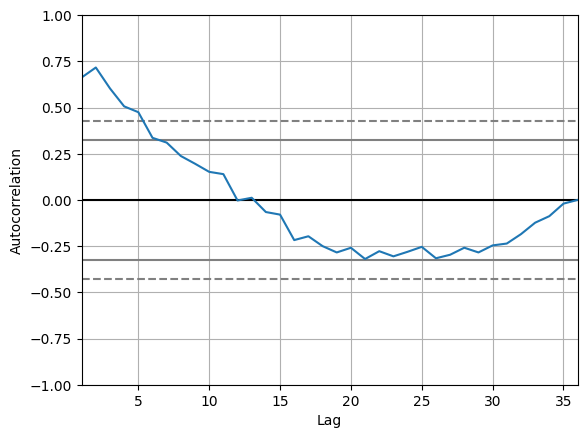

In [14]:
autocorrelation_plot(series)
pyplot.show()

In [15]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()


In [16]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Wed, 10 May 2023   AIC                            408.969
Time:                        16:37:14   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

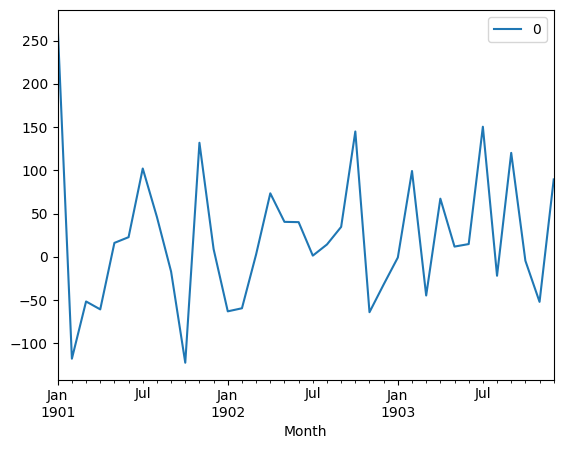

In [17]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

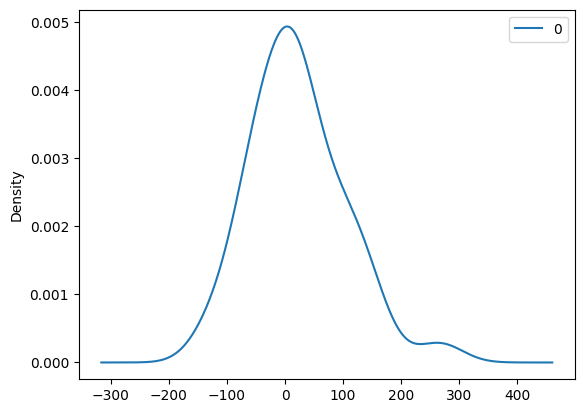

In [18]:
residuals.plot(kind='kde')
pyplot.show()


In [19]:
print(residuals.describe())


                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000
